In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [ ]:
df = pd.read_csv('Orange Quality Data.csv')

In [ ]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [ ]:
# Print column names of the dataset
print(df.columns)


Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')


In [ ]:
# Assuming 'Quality (1-5)' is the name of the target variable
X = df.drop('Quality (1-5)', axis=1)
y = df['Quality (1-5)']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [ ]:
print(y_train.unique())


[4.  2.  2.5 5.  3.5 4.5 1.  3. ]


In [ ]:
# Adjust the code to get feature names after one-hot encoding
feature_names = numeric_features.tolist() + \
                list(clf.named_steps['preprocessor'].
                     named_transformers_['cat'].
                     named_steps['onehot'].
                     get_feature_names_out(categorical_features))


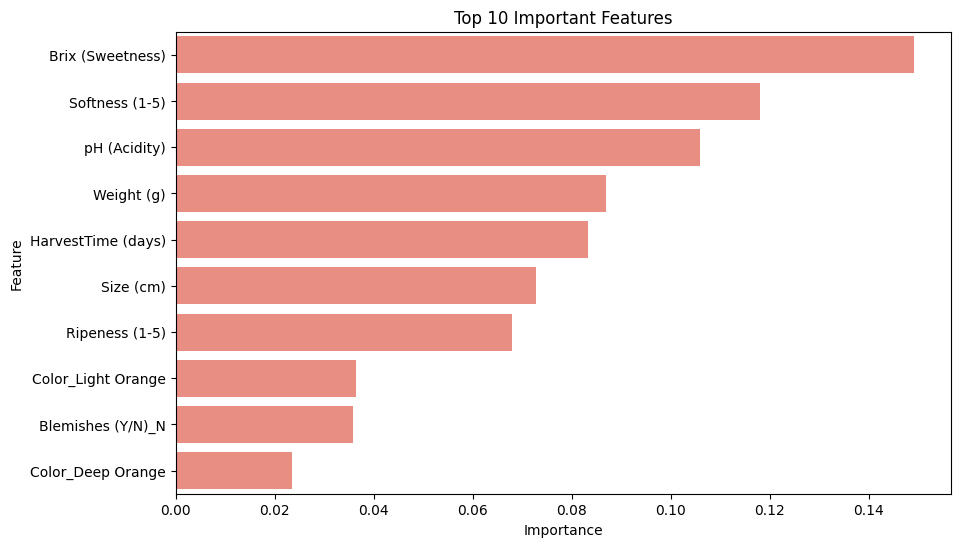

In [ ]:
# Plot feature importances
if isinstance(clf.named_steps['classifier'], RandomForestClassifier):
    feature_importances = clf.named_steps['classifier'].feature_importances_

    # Obtain feature names after preprocessing
    numeric_features_names = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features_names = X.select_dtypes(include=['object']).columns.tolist()
    categorical_features_names_encoded = clf.named_steps['preprocessor']\
        .named_transformers_['cat']\
        .named_steps['onehot']\
        .get_feature_names_out(categorical_features_names)
    feature_names = numeric_features_names + categorical_features_names_encoded.tolist()

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Display top 10 features

# Plot feature importances with a different color
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='salmon')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



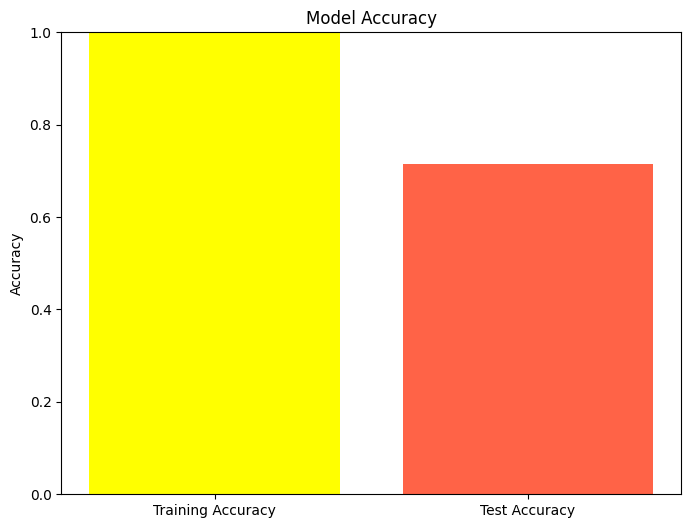

Training Accuracy: 1.0
Test Accuracy: 0.7142857142857143


In [ ]:
# Calculate the accuracy scores
training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

# Plot the accuracy scores with different colors
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy, test_accuracy], color=['yellow', 'tomato'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()


# Print the accuracy scores
print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)




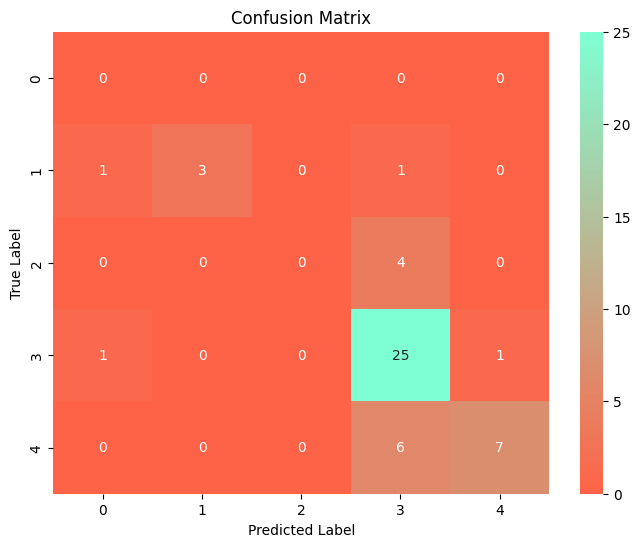

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Define the custom colormap blending two colors
colors = ['#FF6347', '#7FFFD4']  # Specify the two colors
cmap = LinearSegmentedColormap.from_list('Custom', colors)

# Plot the confusion matrix with the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=cmap, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Linear Regressors

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Orange Quality Data.csv')


In [ ]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
# Add some features to the dataset
# For example, let's add a new feature 'Volume' by multiplying 'Size' and 'Weight'
df['Volume'] = df['Size (cm)'] * df['Weight (g)']


In [ ]:
# Split the dataset into features and target variable
X = df.drop('Quality (1-5)', axis=1)
y = df['Quality (1-5)']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:



# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the encoded dataset into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regressor.fit(X_train_encoded, y_train)



LinearRegression()

In [ ]:
# One-hot encode the test set using the same categories as the training set
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Add missing columns to the test set if necessary
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Ensure the order of columns is the same as in the training set
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Predict on the test set
y_pred = linear_regressor.predict(X_test_encoded)


In [ ]:
# Predict on the test set
y_pred = linear_regressor.predict(X_test_encoded)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3570068117285984


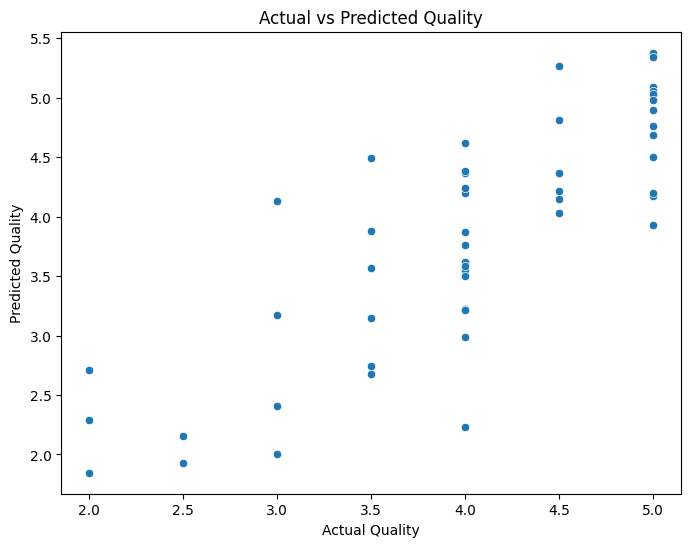

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append Ridge Regression model to the preprocessing pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=0.1))  # You can adjust the regularization strength (alpha)
])

# Train the Ridge Regression model
ridge_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Volume'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Color', 'Variety', 'Blemishes (Y/N)'], dtype='object'))])),
                ('ridge', Ridge(alpha=0.1))])

In [ ]:
# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test_encoded)

# Calculate R^2 score
r2_score = linear_regressor.score(X_test_encoded, y_test)
print("R^2 Score:", r2_score)


R^2 Score: 0.5604520101837009


# SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Now you can use this function in your code to plot the decision boundary
# Example usage:
# plot_decision_boundary(svm_classifier, X_train_scaled, y_train)


In [ ]:
# Load the Orange Quality dataset
orange_quality_data = pd.read_csv("Orange Quality Data.csv")

In [ ]:
# Check the column names in the DataFrame
print(orange_quality_data.columns)


Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')


In [ ]:
# Separate features and target variable using correct column names
X_orange = orange_quality_data[['Size (cm)', 'Weight (g)']]
y_orange = orange_quality_data['Quality (1-5)']


In [ ]:
# Split the data into training and testing sets
X_train_orange, X_test_orange, y_train_orange, y_test_orange = train_test_split(X_orange, y_orange, test_size=0.4, random_state=42)


In [ ]:
# Standardize features
scaler_orange = StandardScaler()
X_train_scaled_orange = scaler_orange.fit_transform(X_train_orange)
X_test_scaled_orange = scaler_orange.transform(X_test_orange)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define and train your SVR model
svr_model = SVR(kernel='rbf', gamma=0.5, C=1)
svr_model.fit(X_train_scaled_orange, y_train_orange)

# Make predictions
y_pred = svr_model.predict(X_test_scaled_orange)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_orange, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.9401020371313356


In [ ]:
# Convert continuous target variable to categorical labels for classification
y_train_orange_class = pd.cut(y_train_orange, bins=5, labels=False)
y_test_orange_class = pd.cut(y_test_orange, bins=5, labels=False)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training data
y_train_orange_encoded = label_encoder.fit_transform(y_train_orange)

# Transform the target variable for testing data
y_test_orange_encoded = label_encoder.transform(y_test_orange)


In [ ]:
from sklearn.svm import SVR

# Perform GridSearchCV for hyperparameter tuning
param_grid_orange = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid_search_orange = GridSearchCV(SVR(), param_grid_orange, verbose=5)
grid_search_orange.fit(X_train_scaled_orange, y_train_orange)

print("Best Parameters (GridSearchCV):", grid_search_orange.best_params_)
best_params_grid_orange = grid_search_orange.best_params_

# Evaluate the best model found by GridSearchCV
best_model_grid_orange = SVR(**best_params_grid_orange)
best_model_grid_orange.fit(X_train_scaled_orange, y_train_orange)
score_grid_orange = best_model_grid_orange.score(X_test_scaled_orange, y_test_orange)
print(f"Accuracy Score (GridSearchCV): {score_grid_orange}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.153 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.161 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.078 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.109 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=1;, score=-0.246 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.104 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.179 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.047 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.094 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.1;, score=-0.324 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.042 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

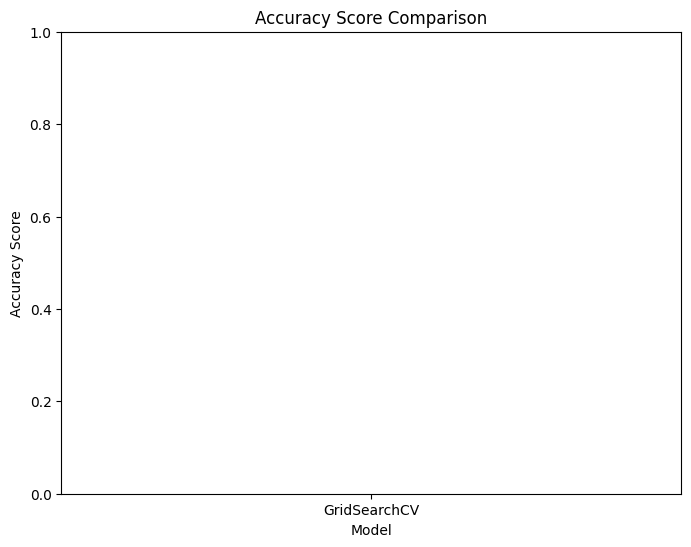

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained the accuracy score
accuracy_scores = [score_grid_orange]  # Replace with your actual accuracy score

# Create a simple bar plot for accuracy
plt.figure(figsize=(8, 6))
plt.bar(["GridSearchCV"], accuracy_scores, color="skyblue")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score Comparison")
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1)
plt.show()


# Decision Tree

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("salaries .csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [36]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [38]:
# Creating extra column in dataframe
# calling fit and tranform method on company,job and deree column
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [39]:
# Dropping label columns
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [40]:
# Training our classifier
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [41]:
model.score(inputs_n,target)

1.0

In [42]:
model.predict([[2,2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [43]:
model.predict([[2,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.4, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2, 0.75, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.4166666666666667, 'x[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.7, 0.25, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.08333333333333333, 'gini = 

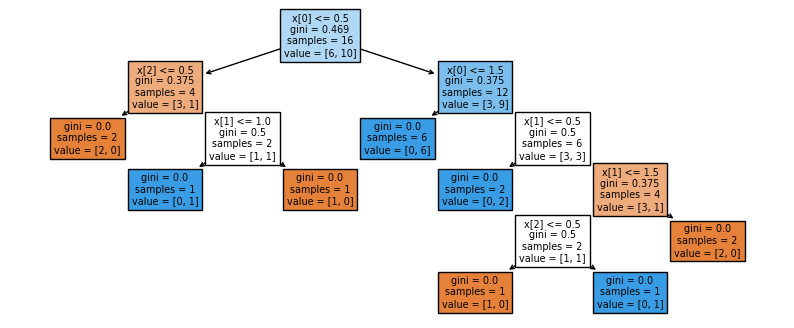

In [44]:
plt.figure(figsize=(10,4))
tree.plot_tree(model,filled=True)

In [45]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 0

